In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [305]:
df = pd.read_csv('data/historical-weather-data-1979.csv')

df.info()
# https://openweathermap.org/api/history-forecast-bulk#sample
df = df.drop(['sea_level', 'grnd_level', 'snow_3h', 'rain_3h'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767992 entries, 0 to 767991
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt                   767992 non-null  int64  
 1   dt_iso               767992 non-null  object 
 2   timezone             767992 non-null  int64  
 3   city_name            767992 non-null  object 
 4   lat                  767992 non-null  float64
 5   lon                  767992 non-null  float64
 6   temp                 767992 non-null  float64
 7   visibility           204404 non-null  float64
 8   dew_point            767992 non-null  float64
 9   feels_like           767992 non-null  float64
 10  temp_min             767992 non-null  float64
 11  temp_max             767992 non-null  float64
 12  pressure             767992 non-null  int64  
 13  sea_level            0 non-null       float64
 14  grnd_level           0 non-null       float64
 15  humidity         

In [306]:
# Normalize the latitude
print("Before: ", df.lat[767991])
print("Before: ", df.lat[0])
df.lat = round(df.lat.copy(), 4)
print("After:  ", df.lat[767991])
print("After:  ", df.lat[0])

Before:  39.3161
Before:  39.836653000000005
After:   39.3161
After:   39.8367


In [307]:
# Get Day, Month, Year from Forecast ISO
df['date'] = pd.to_datetime(df['dt'],unit='s')

dt = pd.DatetimeIndex(df['date'])

df['year'] = dt.year
df['month'] = dt.month
df['day'] = dt.day
df['hour'] = dt.hour

# Get Seasons
seasons = {'winter': [12, 1, 2], 'spring': [3, 4, 5], 'summer': [6, 7, 8], 'fall': [9, 10, 11]}

# create a list of our conditions
conditions_months = [
    (df['month'].isin(seasons['winter'])),
    (df['month'].isin(seasons['spring'])),
    (df['month'].isin(seasons['summer'])),
    (df['month'].isin(seasons['fall'])),
    ]

# create a list of the values we want to assign for each condition
values_seasons = ['winter', 'spring', 'summer', 'fall']

# create a new column and use np.select to assign values to it using our lists as arguments
df['season'] = np.select(conditions_months, values_seasons)

# TODO - group years into decades
decades = {
    '80s': np.arange(start=1979, stop=1990), 
    '90s': np.arange(start=1990, stop=2000), 
    '00s': np.arange(start=2000, stop=2010), 
    '10s': np.arange(start=2010, stop=2020),
    '20s': np.arange(start=2020, stop=2030)
}


conditions_decades = [
    (df['year'].isin(decades['80s'])), # includes 1979
    (df['year'].isin(decades['90s'])),
    (df['year'].isin(decades['00s'])),
    (df['year'].isin(decades['10s'])),
    (df['year'].isin(decades['20s'])),
    ]

# create a list of the values we want to assign for each condition
values_decades = [1980, 1990, 2000, 2010, 2020]

# create a new column and use np.select to assign values to it using our lists as arguments
df['decade'] = np.select(conditions_decades, values_decades)

df.head()

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,weather_main,weather_description,weather_icon,date,year,month,day,hour,season,decade
0,283996800,1979-01-01 00:00:00 +0000 UTC,-25200,Westminster,39.8367,-105.037205,-2.00,NaN,-6.90,-12.06,...,Clouds,broken clouds,04n,1979-01-01 00:00:00,1979,1,1,0,winter,1980
1,284000400,1979-01-01 01:00:00 +0000 UTC,-25200,Westminster,39.8367,-105.037205,-2.13,NaN,-7.26,-10.12,...,Clouds,broken clouds,04n,1979-01-01 01:00:00,1979,1,1,1,winter,1980
2,284004000,1979-01-01 02:00:00 +0000 UTC,-25200,Westminster,39.8367,-105.037205,-3.84,NaN,-8.00,-3.84,...,Clouds,broken clouds,04n,1979-01-01 02:00:00,1979,1,1,2,winter,1980
3,284007600,1979-01-01 03:00:00 +0000 UTC,-25200,Westminster,39.8367,-105.037205,-5.93,NaN,-9.81,-5.93,...,Clouds,broken clouds,04n,1979-01-01 03:00:00,1979,1,1,3,winter,1980
4,284011200,1979-01-01 04:00:00 +0000 UTC,-25200,Westminster,39.8367,-105.037205,-4.77,NaN,-9.36,-4.77,...,Clouds,broken clouds,04n,1979-01-01 04:00:00,1979,1,1,4,winter,1980


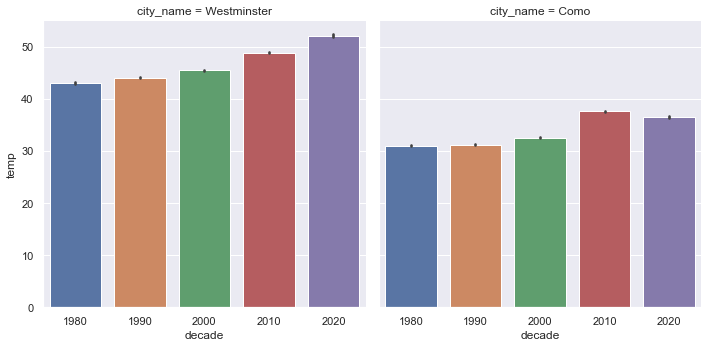

In [234]:
sns.catplot(x="decade", y="temp",
            col="city_name", aspect=1,
            kind="bar", data=df)

([<matplotlib.axis.XTick at 0x13edd6410>,
 [Text(0, 0, '1980'),
  Text(0, 0, '1990'),
  Text(0, 0, '2000'),
  Text(0, 0, '2010')])

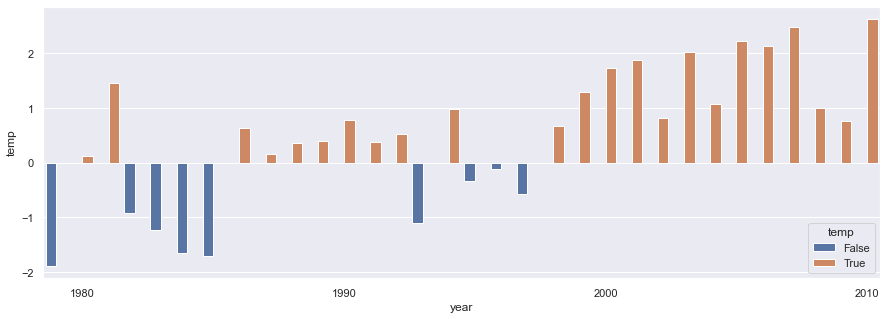

In [227]:
import matplotlib.pyplot as plt

#Climate Change in Colorado
# A Synthesis to Support Water Resources Management and Adaptation
# # Second Edition - August 2014
# A Report for the Colorado Water Conservation Board
# Western Water Assessment, Cooperative Institute for Research in Environmental
# Sciences (CIRES), University of Colorado Boulder
# Copyright © 2014 University of Colorado Boulder
# Funding for this report was provided by the Colorado Water Conservation Board, and
# by the Western Water Assessment through a grant from the NOAA Climate Program

# departures from 1979-2000 reference period
reference_period = df.loc[(df['year']<2001) & (df['year']>1971)]
ref_temp = reference_period['temp'].mean()

temp_departures = df.groupby('year').mean()['temp'] - ref_temp

temp_departures_2010 = temp_departures[:32]
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=temp_departures_2010.index, y=temp_departures_2010, hue=temp_departures_2010>0)

#specify positions of ticks on x-axis and y-axis
plt.xticks(np.arange(1, 40, 10), ['1980', '1990', '2000', '2010'])

([<matplotlib.axis.XTick at 0x13ddeb7d0>,
 [Text(0, 0, '1980'),
  Text(0, 0, '1990'),
  Text(0, 0, '2000'),
  Text(0, 0, '2010'),
  Text(0, 0, '2020')])

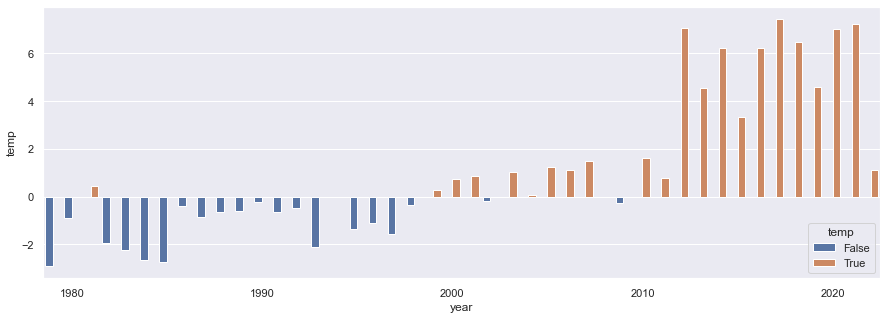

In [231]:
# departures from 1990-2010 reference period updated
reference_period_updated = df.loc[(df['year']<2011) & (df['year']>1989)]
ref_temp_updated = reference_period_updated['temp'].mean()

temp_departures_updated = df.groupby('year').mean()['temp'] - ref_temp_updated

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x=temp_departures_updated.index, y=temp_departures_updated, hue=temp_departures_updated>0)

#specify positions of ticks on x-axis and y-axis
plt.xticks(np.arange(1, 50, 10), ['1980', '1990', '2000', '2010', '2020'])

In [232]:
temps_by_decade = df.groupby('decade').mean()['temp']
temps_by_decade_mean = temps_by_decade.mean()
print(temps_by_decade_mean)

temps_by_decades_diffs = temps_by_decade - temps_by_decade_mean
temps_by_decades_diffs

40.287677009652654


decade
1980   -3.237093
1990   -2.596234
2000   -1.235434
2010    2.990701
2020    4.078059
Name: temp, dtype: float64

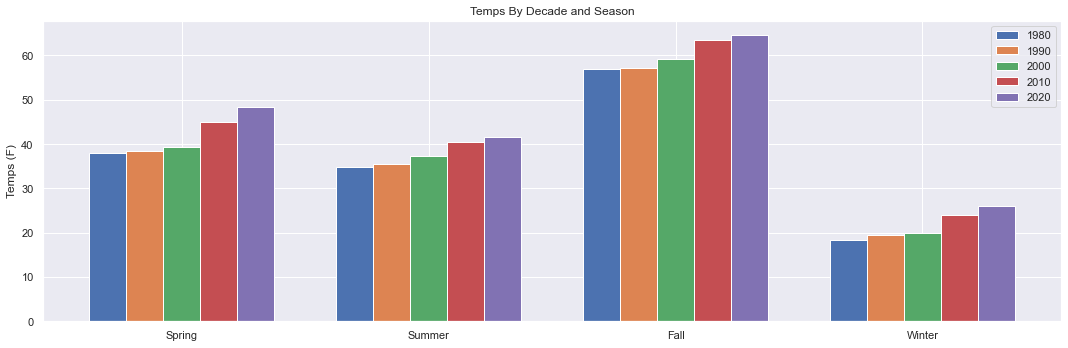

In [237]:
temps_by_decade_season = df.groupby(['decade', 'season']).mean()['temp']
import matplotlib.pyplot as plt
import numpy as np


labels = ['Spring', 'Summer', 'Fall', 'Winter']
men_means = [20, 34, 30, 35]
women_means = [25, 32, 34, 20]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*2, temps_by_decade_season[1980], width, label='1980')
rects2 = ax.bar(x - width, temps_by_decade_season[1990], width, label='1990')
rects3 = ax.bar(x + width*0, temps_by_decade_season[2000], width, label='2000')
rects4 = ax.bar(x + width, temps_by_decade_season[2010], width, label='2010')
rects5 = ax.bar(x + width*2, temps_by_decade_season[2020], width, label='2020')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Temps (F)')
ax.set_title('Temps By Decade and Season')
ax.legend()

plt.xticks(ticks=x, labels=labels)

fig.tight_layout()

plt.show()

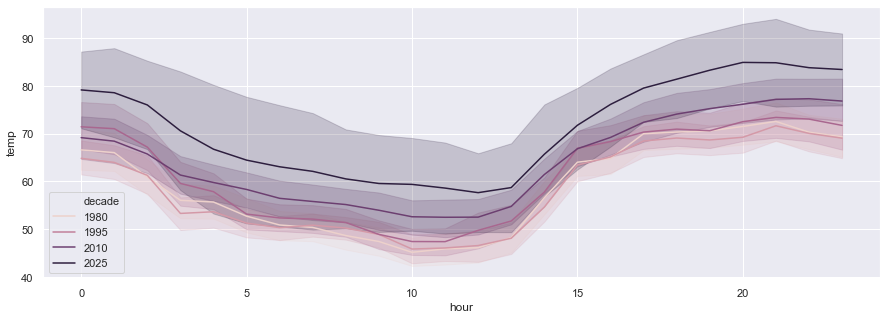

In [294]:
#print(temps_by_day)
#sns.set(rc={'figure.figsize':(15,5)})
today = df.loc[(df['day'] == 9) & (df['month'] == 7)]
sns.set(style='darkgrid')
sns.lineplot(data=today, x='hour', y='temp', hue='decade')

#specify positions of ticks on x-axis and y-axis
#plt.xticks(np.arange(1, 50, 10), ['1980', '1990', '2000', '2010', '2020'])

decade       1980       1990       2000       2010       2020
month                                                        
Jan     17.153478  18.452205  20.017224  23.227354  25.927122
Feb     20.209181  22.300768  21.518583  24.266636  23.246889
Mar     26.462540  28.168415  28.986165  34.050589  33.569117
Apr     34.542852  33.697190  37.130336  39.831739  40.755662
May     43.310640  44.487142  46.050232  47.548961  50.666475
Jun     53.425938  53.996309  55.322756  61.176381  62.384309
Jul     59.327769  59.167675  62.553559  65.526517  66.300101
Aug     57.613579  57.949170  59.343874  63.363299  65.988523
Sep     50.020456  50.974888  51.196867  57.870375  58.772811
Oct     38.390442  38.902990  39.845579  44.069308  47.023129
Nov     25.292249  25.534701  27.166642  32.766528  39.299541
Dec     18.104685  18.035524  18.560319  24.165704  30.062771


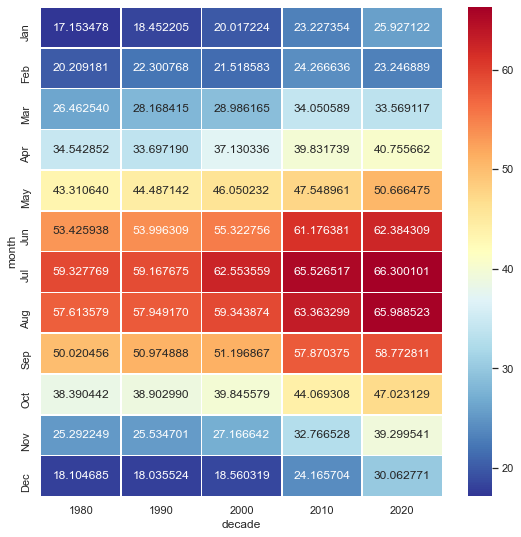

In [328]:
# Draw a heatmap with the numeric values in each cell
temps = df.pivot_table(index='month', columns=['decade'],values='temp', aggfunc=np.mean)
months = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
temps.index = temps.index.to_series().map(months)
print(temps)
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(temps, annot=True, fmt="f", linewidths=.5, ax=ax, cmap="RdYlBu_r")